In [3]:
import pandas as pd
normdf = pd.read_csv("norm_expression.csv") #loading dataset
mapdf = pd.read_csv("gene_mappings.csv") #loading mappings dataset
metadf = pd.read_csv("metadata.csv") #loading metadata dataset

In [4]:
metadf.head()

,mRNA,PAM50,TumorPurity,ProliferationScore,ER,PR,HER2
0,TCGA-B6-A0IG-01A-11R-A034-07,LumA,0.73,-0.568397,Positive,Positive,Positive
1,TCGA-BH-A0HQ-01A-11R-A034-07,LumA,0.52,-0.821974,NaN,NaN,Negative
2,TCGA-BH-A18G-01A-11R-A12D-07,Basal,0.79,0.423067,Negative,Negative,Negative
3,TCGA-A8-A09K-01A-11R-A00Z-07,LumA,1.00,0.026868,Positive,Positive,Negative
4,TCGA-BH-A0BZ-01A-31R-A12P-07,LumB,0.37,0.247682,Positive,Positive,Negative


In [5]:
#merging mapping df with gene expression df
normdf.rename(columns={'Unnamed: 0': 'ENSEMBLID'}, inplace=True)
normdf = pd.merge(normdf, mapdf, on =  "ENSEMBLID", how='left')
normdf.set_index("ENSEMBLID", inplace=True)
normdf.head()

,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-BH-A0HQ-01A-11R-A034-07,TCGA-BH-A18G-01A-11R-A12D-07,TCGA-A8-A09K-01A-11R-A00Z-07,TCGA-BH-A0BZ-01A-31R-A12P-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,TCGA-A1-A0SK-01A-12R-A084-07,...,TCGA-41-2572-01A-01R-1850-01,TCGA-06-0138-01A-02R-1849-01,TCGA-06-0211-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-28-2499-01A-01R-1850-01,TCGA-06-1804-01A-01R-1849-01,TCGA-26-1442-01A-01R-1850-01,TCGA-28-1747-01C-01R-1850-01,GENESYMBOL,GENETYPE
ENSEMBLID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,11.643945,12.660240,12.011286,10.902371,9.778870,11.086341,13.304347,11.204773,12.835616,12.470305,...,12.294185,12.843887,12.083013,13.196523,13.764084,11.588476,12.021739,12.586284,TSPAN6,protein_coding
ENSG00000000005,3.527251,1.141077,0.000000,2.923184,3.371978,5.487672,3.474578,2.517265,7.229333,0.000000,...,3.783844,5.468667,3.113357,3.538314,3.256006,2.887933,2.922775,3.424977,TNMD,protein_coding
ENSG00000000419,11.004391,10.379188,10.492609,10.625022,12.325179,11.250164,10.834781,11.193174,12.695187,11.631386,...,10.692166,11.044221,10.430246,11.321920,10.528515,10.027390,10.016298,10.270992,DPM1,protein_coding
ENSG00000000457,10.216685,10.975065,10.788455,11.340000,10.827489,10.294248,10.472310,11.166237,10.304750,9.737110,...,8.542477,9.221241,8.977203,10.255138,8.946696,8.857296,9.003882,9.138294,SCYL3,protein_coding
ENSG00000000460,9.076165,9.584343,9.316149,8.781399,9.825582,8.366424,8.994853,10.627795,9.219602,10.100473,...,8.379882,8.966339,8.967783,10.208429,7.872731,7.985417,7.840538,8.497433,C1orf112,protein_coding


In [6]:
print(normdf.shape)

(60616, 785)


In [7]:
#filtering for only protein coding genes
fnormdf = normdf.loc[normdf["GENETYPE"] == "protein_coding", :]
print(fnormdf.shape)

(19944, 785)


In [8]:
tnormdf = fnormdf.T
print(tnormdf.shape)

(785, 19944)


In [9]:
#Removing all genes with over 50% zeroes
zero_proportion = (tnormdf == 0).sum() / (len(tnormdf) - 2) #subtracted 2 because of the added 2 columns for gene mapping

no0df = tnormdf.loc[:, zero_proportion < 0.5]

no0df.shape

(785, 17349)

In [10]:
#Removing all genes with means less than 10
genemaprows = no0df.loc[["GENETYPE","GENESYMBOL"]]
fltno0df = no0df.drop(["GENETYPE", "GENESYMBOL"])
colmeans = fltno0df.mean(axis = 0)
filtereddf = fltno0df.loc[:,colmeans >= 10]
print(filtereddf.shape)


(783, 8094)


In [11]:
#taking top 2000 columns with highest variances
import numpy as np
variances = np.var(filtereddf, axis=0)
filtereddf.loc['variances'] = variances
filtereddf = filtereddf.sort_values(by='variances', axis=1, ascending=False)
finaldf = filtereddf.iloc[:, 0:2000]
print(finaldf.shape)
finaldf = finaldf.drop(index = "variances")


/var/folders/cq/p_chwn9x2t35s219lxhwjrd80000gn/T/ipykernel_39274/3561000705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtereddf.loc['variances'] = variances


(784, 2000)


In [12]:
finaldf.to_csv("filtered_gene_expression.csv")

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
#Removes all rows with NAs in the ER col from metadf
metadf.set_index("mRNA", inplace=True)
ERmetadf = metadf.dropna(subset=['ER'])
ERfinaldf = finaldf.loc[ERmetadf.index] #Removes all rows with NA ER values from finaldf

In [15]:
ERfinaldf.shape
#ERfinaldf = ERfinaldf.reindex(ERmetadf.index) #Reindexes ERfinaldf to ensure it is in the same order as ERmetadf

(672, 2000)

In [16]:
import matplotlib.patches as mpatches

Explained variance ratio by each component:
[0.18050885 0.0922611 ]


/var/folders/cq/p_chwn9x2t35s219lxhwjrd80000gn/T/ipykernel_39274/1325464834.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ERmetadf['Color'] = ERmetadf['ER'].map(color_map)


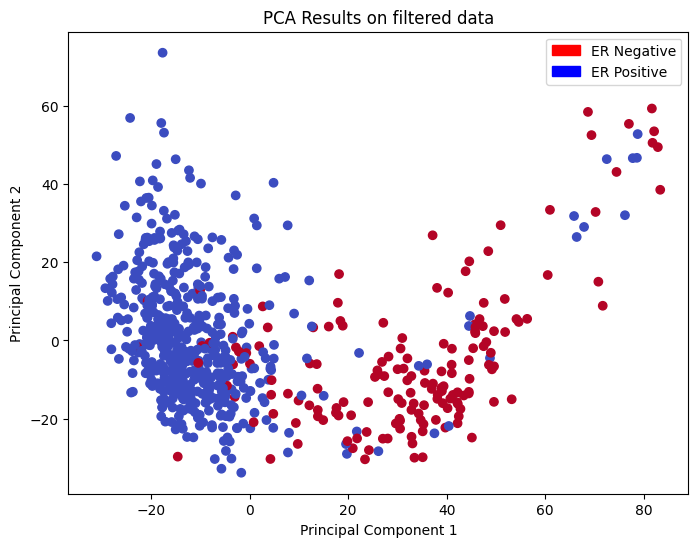

Principal Components:
[[-0.12610968 -0.1438398  -0.1254625  ... -0.00503426 -0.00614197
  -0.00779519]
 [-0.06209599  0.02254188  0.01350566 ...  0.01464468  0.01171446
   0.00578805]]


In [17]:
#Two Color, fully filtered data PCA (Blue = Positive ER, Red = Negative ER)
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(ERfinaldf)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

color_map = {'Positive': 0, 'Negative': 1}

ERmetadf['Color'] = ERmetadf['ER'].map(color_map)

print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=ERmetadf['Color'], cmap='coolwarm')
plt.title("PCA Results on filtered data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
red_patch = mpatches.Patch(color='red', label='ER Negative')
blue_patch = mpatches.Patch(color='blue', label='ER Positive')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')
plt.show()

print("Principal Components:")
print(pca.components_)

In [18]:
#Prepping PAM50 Colorscheme
metadf['PAM50'] = metadf['PAM50'].replace('nan', np.nan)
PAM50metadf = metadf.dropna(subset=['PAM50'])
color_map = {'LumA': "blue", 'LumB': "green",'Her2': "pink", "HER2": "pink", "Basal":"red", "Normal": "black"}
colors = list(PAM50metadf['PAM50'].map(color_map))

In [19]:
metadf

,PAM50,TumorPurity,ProliferationScore,ER,PR,HER2
mRNA,,,,,,
TCGA-B6-A0IG-01A-11R-A034-07,LumA,0.730000,-0.568397,Positive,Positive,Positive
TCGA-BH-A0HQ-01A-11R-A034-07,LumA,0.520000,-0.821974,NaN,NaN,Negative
TCGA-BH-A18G-01A-11R-A12D-07,Basal,0.790000,0.423067,Negative,Negative,Negative
TCGA-A8-A09K-01A-11R-A00Z-07,LumA,1.000000,0.026868,Positive,Positive,Negative
TCGA-BH-A0BZ-01A-31R-A12P-07,LumB,0.370000,0.247682,Positive,Positive,Negative
...,...,...,...,...,...,...
TCGA-06-0178-01A-01R-1849-01,Basal,0.895578,0.505451,Negative,Positive,Positive
TCGA-28-2499-01A-01R-1850-01,LumA,0.708586,-0.794562,Negative,Positive,Positive
TCGA-06-1804-01A-01R-1849-01,LumA,0.832047,-0.287635,Negative,Negative,Positive


In [20]:
#Prepping PAM50FinalDf for PCA
PAM50finaldf = finaldf.loc[PAM50metadf.index] #Removes all rows with NA PAM50 values from finaldf

Explained variance ratio by each component:
[0.17853079 0.09401146]


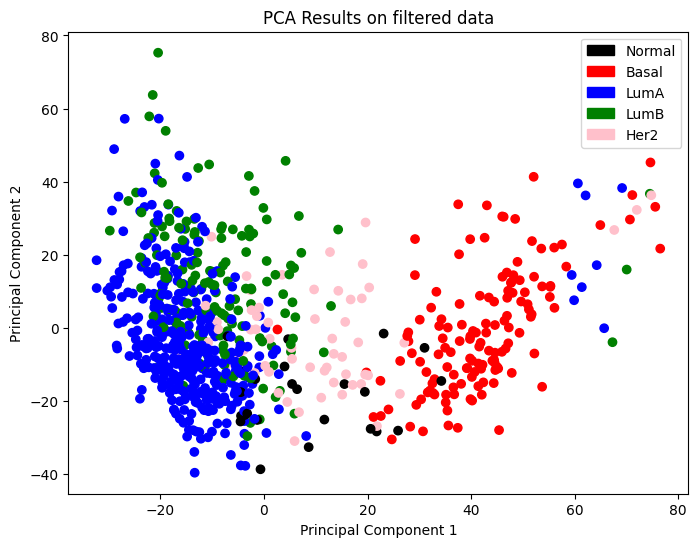

Principal Components:
[[-0.12298456 -0.14711011 -0.12647004 ... -0.00557426 -0.00640191
  -0.00753839]
 [-0.06307849  0.00522497  0.00383048 ...  0.01231925  0.00796755
   0.0042639 ]]


In [21]:
#PCA of fully filtered data
ca = PCA(n_components=2)  
pca_result = pca.fit_transform(PAM50finaldf)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])


print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c= colors)
plt.title("PCA Results on filtered data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
black_patch = mpatches.Patch(color='black', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='LumA')
green_patch = mpatches.Patch(color = "green", label = "LumB")
pink_patch = mpatches.Patch(color = "pink", label = 'Her2')
red_patch = mpatches.Patch(color = "red", label = "Basal")
plt.legend(handles=[black_patch, red_patch, blue_patch, green_patch, pink_patch], loc='upper right')
plt.show()

print("Principal Components:")
print(pca.components_)

In [22]:
#Prepping ERproteincodingdf for color scheme
ERproteincodingdf = tnormdf.drop(["GENETYPE", "GENESYMBOL"]) 
ERproteincodingdf = ERproteincodingdf.loc[ERmetadf.index]

Explained variance ratio by each component:
[0.10732232 0.07225175]


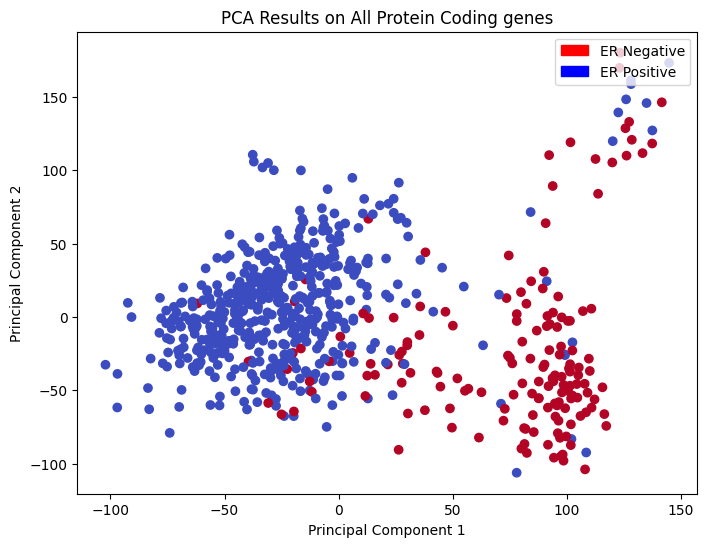

Principal Components:
[[ 0.00577007  0.00210879  0.0012453  ...  0.          0.00050624
   0.00365662]
 [ 0.00174965  0.02307679 -0.00681683 ...  0.          0.00335261
  -0.00058725]]


In [23]:
#PCA on all Protein coding genes
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(ERproteincodingdf)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=ERmetadf['Color'], cmap='coolwarm')
plt.title("PCA Results on All Protein Coding genes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
red_patch = mpatches.Patch(color='red', label='ER Negative')
blue_patch = mpatches.Patch(color='blue', label='ER Positive')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')
plt.show()

print("Principal Components:")
print(pca.components_)

In [35]:
#Prepping PAM50proteincodingdf for PCA
PAM50proteincodingdf = tnormdf.loc[PAM50metadf.index]
PAM50proteincodingdf

ENSEMBLID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288649,ENSG00000288654,ENSG00000288656,ENSG00000288658,ENSG00000288660,ENSG00000288661,ENSG00000288669,ENSG00000288671,ENSG00000288674,ENSG00000288675
mRNA,,,,,,,,,,,,,,,,,,,,,
TCGA-B6-A0IG-01A-11R-A034-07,11.643945,3.527251,11.004391,10.216685,9.076165,7.783741,10.348749,12.012949,10.600227,12.267786,...,0.0,0.0,0.908777,2.173068,0.908777,0.0,0.0,0.0,2.836364,6.256653
TCGA-BH-A0HQ-01A-11R-A034-07,12.66024,1.141077,10.379188,10.975065,9.584343,8.944935,10.714418,10.992242,10.546669,11.77927,...,0.0,0.0,1.141077,2.541472,1.141077,0.0,0.0,0.0,3.706483,5.068126
TCGA-BH-A18G-01A-11R-A12D-07,12.011286,0.0,10.492609,10.788455,9.316149,8.227938,11.340592,12.05009,10.674891,11.661545,...,0.0,0.0,0.0,5.738497,0.0,0.0,0.0,0.0,1.555998,5.511864
TCGA-A8-A09K-01A-11R-A00Z-07,10.902371,2.923184,10.625022,11.34,8.781399,8.362652,10.485102,10.263429,10.575038,11.34974,...,0.0,0.0,2.101849,1.068692,2.430318,0.0,0.0,0.0,1.675843,5.655033
TCGA-BH-A0BZ-01A-31R-A12P-07,9.77887,3.371978,12.325179,10.827489,9.825582,9.580063,12.807175,11.350575,10.903103,11.763946,...,0.0,0.0,0.0,4.361508,0.0,0.0,0.0,0.0,2.137862,4.027236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-06-0178-01A-01R-1849-01,13.196523,3.538314,11.32192,10.255138,10.208429,8.35149,8.792546,10.06087,11.073288,10.28614,...,0.0,0.0,0.0,4.687945,2.182501,0.0,0.0,0.0,3.921969,6.645344
TCGA-28-2499-01A-01R-1850-01,13.764084,3.256006,10.528515,8.946696,7.872731,8.9251,12.3848,10.828116,10.640976,10.352284,...,0.0,0.0,0.0,5.451762,0.0,0.0,0.0,0.0,2.222099,5.53015
TCGA-06-1804-01A-01R-1849-01,11.588476,2.887933,10.02739,8.857296,7.985417,8.862975,12.395263,11.153173,12.073953,11.033009,...,0.0,0.0,0.0,5.333679,1.500378,0.0,0.0,0.0,3.056007,6.120888


Explained variance ratio by each component:
[0.10889832 0.07004751]


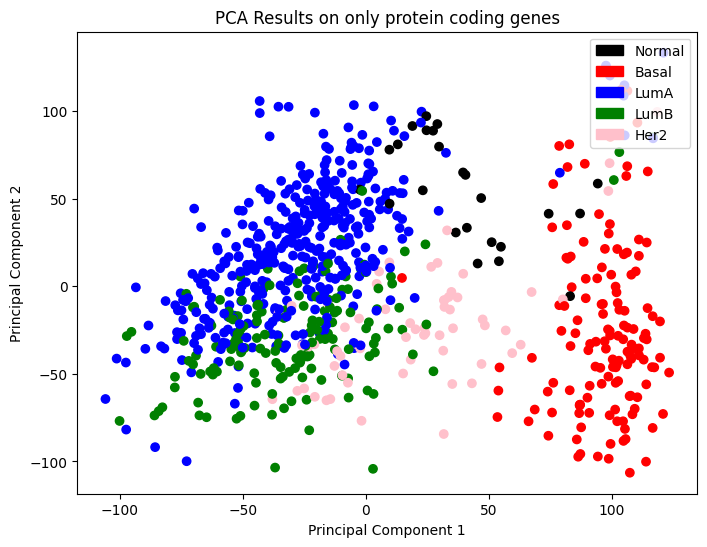

Principal Components:
[[ 0.00625032  0.00259489  0.00163717 ...  0.          0.00053835
   0.0033419 ]
 [ 0.00292305  0.02747529 -0.00660505 ...  0.          0.00388417
  -0.00137311]]


In [25]:
#PCA of protein coding genes
ca = PCA(n_components=2)  
pca_result = pca.fit_transform(PAM50proteincodingdf)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])


print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c= colors)
plt.title("PCA Results on only protein coding genes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
black_patch = mpatches.Patch(color='black', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='LumA')
green_patch = mpatches.Patch(color = "green", label = "LumB")
pink_patch = mpatches.Patch(color = "pink", label = 'Her2')
red_patch = mpatches.Patch(color = "red", label = "Basal")
plt.legend(handles=[black_patch, red_patch, blue_patch, green_patch, pink_patch], loc='upper right')
plt.show()

print("Principal Components:")
print(pca.components_)

In [26]:
#Prepping ERnormdf for color scheme
ERnormdf = normdf.T.drop(["GENETYPE", "GENESYMBOL"])
ERnormdf = ERnormdf.loc[ERmetadf.index]

Explained variance ratio by each component:
[0.10880292 0.07885161]


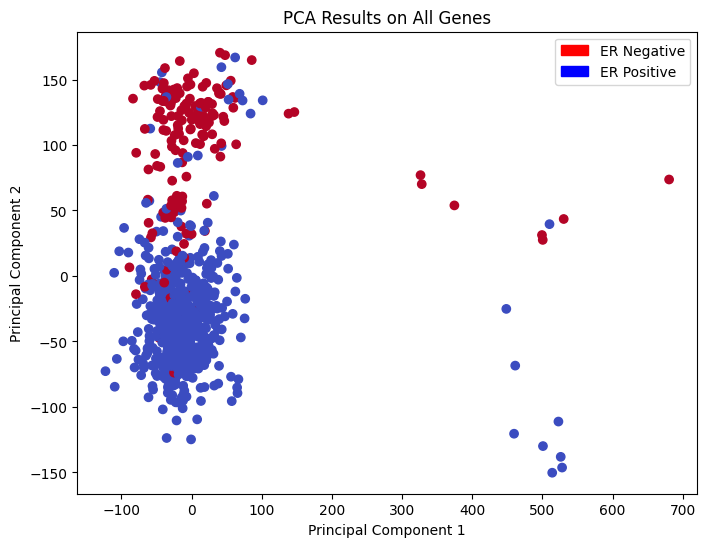

Principal Components:
[[ 0.00028333  0.00772955 -0.00213465 ...  0.          0.00247874
  -0.00133513]
 [ 0.00434139 -0.00099144  0.00173091 ... -0.         -0.00026237
   0.00339677]]


In [27]:
#PCA on all Genes
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(ERnormdf)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=ERmetadf['Color'], cmap='coolwarm')
plt.title("PCA Results on All Genes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
red_patch = mpatches.Patch(color='red', label='ER Negative')
blue_patch = mpatches.Patch(color='blue', label='ER Positive')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')
plt.show()

print("Principal Components:")
print(pca.components_)

In [28]:
#Prepping PAM50normdf for PCA
PAM50normdf = normdf.T.drop(["GENETYPE", "GENESYMBOL"])
PAM50normdf = PAM50normdf.loc[PAM50metadf.index]

In [34]:
PAM50normdf

ENSEMBLID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288661,ENSG00000288662,ENSG00000288663,ENSG00000288665,ENSG00000288667,ENSG00000288669,ENSG00000288670,ENSG00000288671,ENSG00000288674,ENSG00000288675
mRNA,,,,,,,,,,,,,,,,,,,,,
TCGA-B6-A0IG-01A-11R-A034-07,11.643945,3.527251,11.004391,10.216685,9.076165,7.783741,10.348749,12.012949,10.600227,12.267786,...,0.0,0.0,4.817678,0.0,0.0,0.0,8.055234,0.0,2.836364,6.256653
TCGA-BH-A0HQ-01A-11R-A034-07,12.66024,1.141077,10.379188,10.975065,9.584343,8.944935,10.714418,10.992242,10.546669,11.77927,...,0.0,0.0,4.425779,0.0,0.0,0.0,9.160846,0.0,3.706483,5.068126
TCGA-BH-A18G-01A-11R-A12D-07,12.011286,0.0,10.492609,10.788455,9.316149,8.227938,11.340592,12.05009,10.674891,11.661545,...,0.0,0.0,2.770006,0.0,0.0,0.0,9.035898,0.0,1.555998,5.511864
TCGA-A8-A09K-01A-11R-A00Z-07,10.902371,2.923184,10.625022,11.34,8.781399,8.362652,10.485102,10.263429,10.575038,11.34974,...,0.0,0.0,5.30062,0.0,1.068692,0.0,9.291383,0.0,1.675843,5.655033
TCGA-BH-A0BZ-01A-31R-A12P-07,9.77887,3.371978,12.325179,10.827489,9.825582,9.580063,12.807175,11.350575,10.903103,11.763946,...,0.0,0.0,4.419982,0.0,0.0,0.0,8.570698,0.0,2.137862,4.027236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-06-0178-01A-01R-1849-01,13.196523,3.538314,11.32192,10.255138,10.208429,8.35149,8.792546,10.06087,11.073288,10.28614,...,0.0,0.0,5.975894,0.0,0.0,0.0,7.749089,0.0,3.921969,6.645344
TCGA-28-2499-01A-01R-1850-01,13.764084,3.256006,10.528515,8.946696,7.872731,8.9251,12.3848,10.828116,10.640976,10.352284,...,0.0,0.0,5.709292,0.0,0.0,0.0,8.056115,0.0,2.222099,5.53015
TCGA-06-1804-01A-01R-1849-01,11.588476,2.887933,10.02739,8.857296,7.985417,8.862975,12.395263,11.153173,12.073953,11.033009,...,0.0,0.0,6.692559,0.0,0.0,0.0,7.948503,0.0,3.056007,6.120888


Explained variance ratio by each component:
[0.0997269  0.08081518]


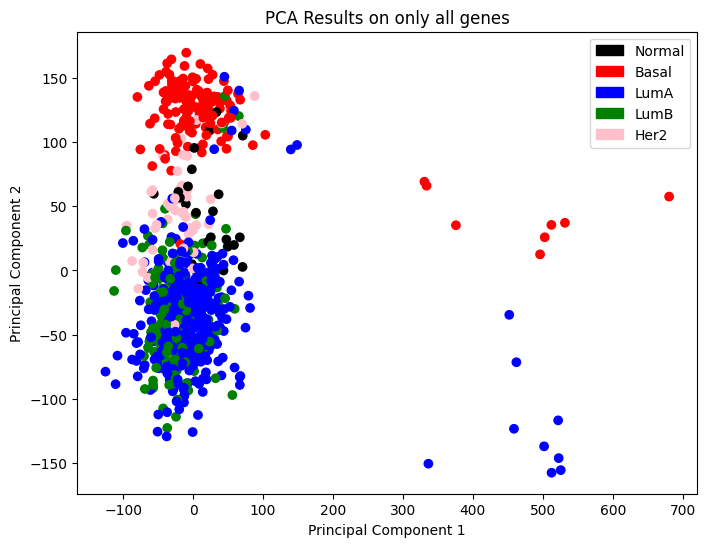

Principal Components:
[[ 0.00075862  0.00822293 -0.00214422 ... -0.          0.00266531
  -0.00143063]
 [ 0.00459812 -0.00027544  0.00190765 ...  0.         -0.00020668
   0.003128  ]]


In [29]:
#PCA of all genes
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(PAM50normdf)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])


print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c= colors)
plt.title("PCA Results on only all genes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
black_patch = mpatches.Patch(color='black', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='LumA')
green_patch = mpatches.Patch(color = "green", label = "LumB")
pink_patch = mpatches.Patch(color = "pink", label = 'Her2')
red_patch = mpatches.Patch(color = "red", label = "Basal")
plt.legend(handles=[black_patch, red_patch, blue_patch, green_patch, pink_patch], loc='upper right')
plt.show()

print("Principal Components:")
print(pca.components_)

# MODEL TESTING PCA


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    r2_score,
    roc_curve,
    auc,
    precision_recall_curve
)

# logistic regression classifi÷er

In [40]:
# 6 is for missing values, no y values in 6 of minji data set, did not remove outliers 

In [ ]:
# retrieving the right files: metadata and gene expression
df = pd.read_csv("filtered_gene_expression.csv")
metadata = pd.read_csv("metadata.csv")

print(f"Gene expression data shape: {df.shape}")
print(f"Metadata shape: {metadata.shape}")

# merging metadata with gene expression data transpose left join here 
df.rename(columns={'Unnamed: 0': 'mRNA'}, inplace=True) 
df = pd.merge(df, metadata, on='mRNA', how='left')
df.set_index("mRNA", inplace=True)

# two different data samples, one for training and one for testing, so one with er value and one with no er value
df_without_miss_er = df.dropna(subset=['ER'])
df_with_er = df[df['ER'].isna()]

print(f"Training data shape: {df_train.shape}")
print(f"Testing data shape: {df_test.shape}")

Gene expression data shape: (783, 2001)
Metadata shape: (783, 7)
Training data shape: (672, 2006)
Testing data shape: (111, 2006)


In [95]:
# Setting up the X and y for logistic regression 
X_train = df_without_miss_er.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2"])
y_train = df_without_miss_er['ER']
# For testing, you only have the features since ER is missing
X_test = df_with_er.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2"])
# Note: y_test is not available because the ER values are missing in df_test

In [103]:
# now we need to label encode the categorical values to numerical 
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
print("Encoded classes:", np.unique(y_train_encoded))

clf = LogisticRegression()
clf.fit(X_train, y_train_encoded)

predictions_encoded = clf.predict(X_test)
predictions = label_encoder.inverse_transform(predictions_encoded)
print(predictions)


Encoded classes: [0 1]
['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Positive' 'Negative' 'Negative' 'Negative' 'Positive'
 'Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Positive' 'Negative' 'Negative' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Negative' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Positive' 'Positive' 'Negative' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Negative' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Negative' 'Negative' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Negative' 'Negative' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Posi

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
pos = 0
neg = 0
for string in predictions: 
    if string ==  'Positive':
        pos += 1 
    else: 
        neg += 1
print( pos, neg )
        

92 19


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the original training data into training and validation sets (e.g., 80/20 split)
X_train_val, X_valid, y_train_val, y_valid = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Train the model on the training portion
clf.fit(X_train_val, y_train_val)

# Validate on the hold-out set
y_pred = clf.predict(X_valid)
print("Validation Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))


Validation Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.95      0.99      0.97        97

    accuracy                           0.96       135
   macro avg       0.96      0.93      0.94       135
weighted avg       0.96      0.96      0.95       135



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Loading filtered dataset
df = pd.read_csv("filtered_gene_expression.csv")
df.shape
#loading meta dataset
metadf = pd.read_csv("metadata.csv")
metadf.shape 
(783, 2001)
#merging meta df with gene expression df
df.rename(columns={'Unnamed: 0': 'mRNA'}, inplace=True)
df = pd.merge(df, metadf, on =  "mRNA", how='left')
df.set_index("mRNA", inplace=True)
df.shape
(783, 2006)
#setting up x and y for random forest
df = df.dropna(subset=["ER"])

X = df.drop(columns=["PAM50", "TumorPurity", "ProliferationScore", "ER", "PR", "HER2"]) 
y = df["ER"] 

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print initial data shapes for verification
print("Initial data shapes:")
print(f"Metadata shape: {metadf.shape}")
print(f"PCA data shape: {pca_df.shape}")
print(f"Training data shape: {train_df.shape}")
print(f"Prediction data shape: {predict_df.shape}")

# Print split sizes
print("\nSplit sizes:")
print(f"Training split: {X_train_split.shape}")
print(f"Validation split: {X_val.shape}")

# Print diagnostic information
print("\nTraining set size:", X_train.shape)
print("Prediction set size:", X_predict.shape)

model = LogisticRegression(random_state=42)
model.fit(X_train_split, y_train_split)

# Validate the model on the validation set
y_val_pred = model.predict(X_val)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.3f} (+/- {:.3f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Train final model on the full training data
model.fit(X_train, y_train)

# Make predictions for samples with missing ER values
if not X_predict.empty:
    predicted_er = model.predict(X_predict)
    metadf.loc[predict_df.index, 'ER'] = predicted_er
    print("\nNumber of ER predictions made:", len(predicted_er))
    print("Predicted ER value counts:")
    print(pd.Series(predicted_er).value_counts())
else:
    print("\nNo missing ER values found. Skipping prediction.")

# Evaluate model performance on training data
y_pred_train = model.predict(X_train)
print("\nTraining Data Classification Report:")
print(classification_report(y_train, y_pred_train))

# Save the updated metadata with predictions
output_path = "metadata_with_predictions.csv"
metadf.to_csv(output_path)
print(f"\nUpdated metadata saved to: {output_path}")


Initial data shapes:
Metadata shape: (783, 7)
PCA data shape: (783, 2)
Training data shape: (672, 6)
Prediction data shape: (111, 6)

Split sizes:
Training split: (537, 2)
Validation split: (135, 2)

Training set size: (672, 2)
Prediction set size: (111, 2)

Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.64      0.74        33
    Positive       0.89      0.97      0.93       102

    accuracy                           0.89       135
   macro avg       0.88      0.80      0.83       135
weighted avg       0.89      0.89      0.88       135


Cross-Validation Accuracy Scores: [0.95555556 0.91851852 0.89552239 0.91044776 0.87313433]
Mean CV Accuracy: 0.911 (+/- 0.055)


KeyError: "None of [Index(['TCGA-BH-A0HQ-01A-11R-A034-07', 'TCGA-A1-A0SD-01A-11R-A115-07',\n       'TCGA-A2-A0CQ-01A-21R-A034-07', 'TCGA-A2-A0CS-01A-11R-A115-07',\n       'TCGA-A2-A0YC-01A-11R-A109-07', 'TCGA-A2-A0YT-01A-11R-A109-07',\n       'TCGA-A2-A3XT-01A-11R-A22U-07', 'TCGA-A2-A3XY-01A-11R-A239-07',\n       'TCGA-A2-A3XZ-01A-42R-A239-07', 'TCGA-A7-A0DA-01A-31R-A115-07',\n       ...\n       'TCGA-AN-A0FT-01A-11R-A034-07', 'TCGA-BH-A0E7-01A-11R-A034-07',\n       'TCGA-BH-A0WA-01A-11R-A109-07', 'TCGA-BH-A1FJ-01A-11R-A13Q-07',\n       'TCGA-C8-A12X-01A-11R-A115-07', 'TCGA-D8-A1XC-01A-11R-A14D-07',\n       'TCGA-E2-A14T-01A-11R-A115-07', 'TCGA-E2-A1LG-01A-21R-A14M-07',\n       'TCGA-E9-A54X-01A-11R-A266-07', 'TCGA-EW-A1OX-01A-11R-A144-07'],\n      dtype='object', name='mRNA', length=111)] are in the [index]"

# lasso

Dataset sizes:
Training set: (537, 2)
Validation set: (135, 2)
Prediction set: (111, 2)

Class mapping:
Negative -> 0
Positive -> 1

Optimal alpha: 0.000100
Number of iterations: 3

Initial Model Performance:
Training R² Score: 0.5867
Validation R² Score: 0.5268
Training MSE: 0.0756
Validation MSE: 0.0874

Performing 5-fold Cross Validation:

Fold 1 Results:
Accuracy: 0.9333
Precision: 0.9231
Recall: 0.9897
F1 Score: 0.9552
R² Score: 0.6780

Fold 2 Results:
Accuracy: 0.8963
Precision: 0.9143
Recall: 0.9505
F1 Score: 0.9320
R² Score: 0.5425

Fold 3 Results:
Accuracy: 0.9104
Precision: 0.9375
Recall: 0.9375
F1 Score: 0.9375
R² Score: 0.5767

Fold 4 Results:
Accuracy: 0.9552
Precision: 0.9573
Recall: 0.9912
F1 Score: 0.9739
R² Score: 0.5583

Fold 5 Results:
Accuracy: 0.8955
Precision: 0.9238
Recall: 0.9417
F1 Score: 0.9327
R² Score: 0.5132

Cross-validation Summary:
Accuracy: 0.9182 (+/- 0.0461)
Precision: 0.9312 (+/- 0.0300)
Recall: 0.9621 (+/- 0.0470)
F1: 0.9463 (+/- 0.0323)
R2: 0.5737 

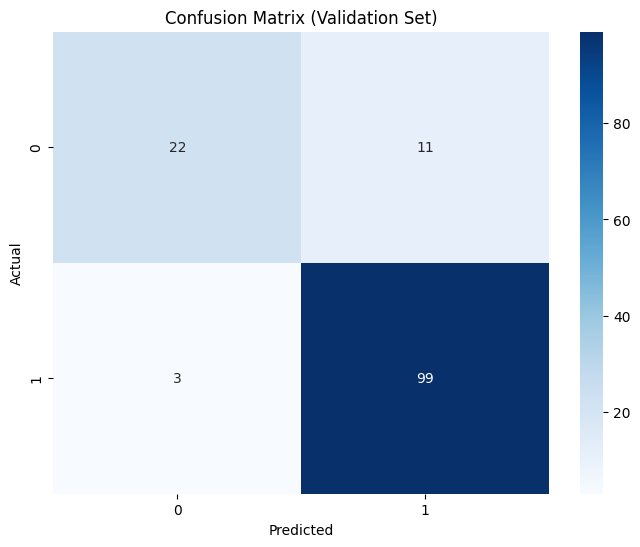

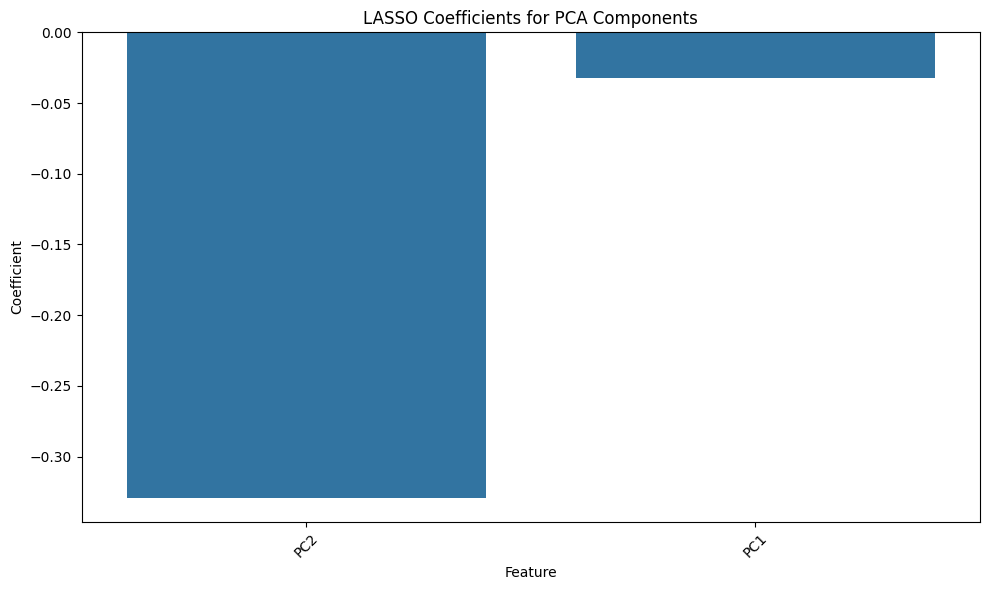

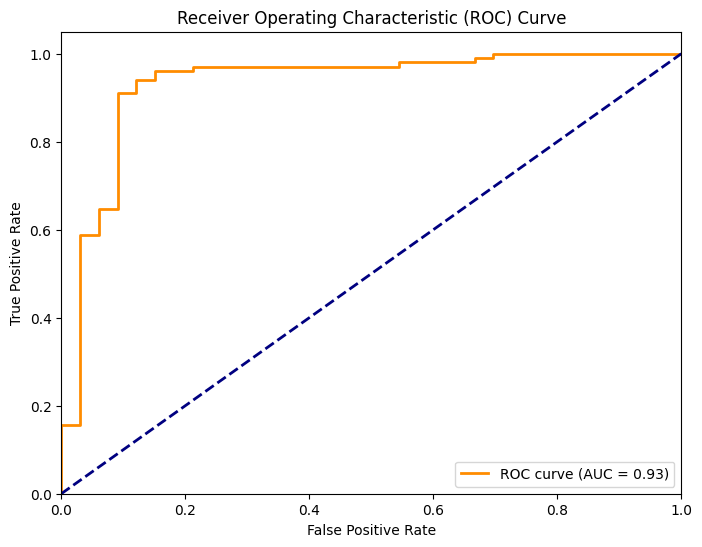


Prediction Summary:
Number of predictions: 111

Predicted value distribution:
Positive    88
Negative    23
Name: count, dtype: int64

Updated metadata saved to: metadata_with_lasso_predictions.csv
Feature importance saved to: lasso_feature_importance.csv


In [32]:
# Prepare training data using the PCA features
X_train = pca_df.loc[train_df.index]
y_train = train_df['ER']

# Data for prediction
X_predict = pca_df.loc[predict_df.index]

# Split training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("Dataset sizes:")
print(f"Training set: {X_train_split.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Prediction set: {X_predict.shape}")

# Convert categorical labels to numerical values
label_encoder = LabelEncoder()
y_train_split_encoded = label_encoder.fit_transform(y_train_split)
y_val_encoded = label_encoder.transform(y_val)
y_train_encoded = label_encoder.transform(y_train)

# Print class mapping
print("\nClass mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

# Scale features
scaler = StandardScaler()
X_train_split_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)
X_train_scaled = scaler.transform(X_train)

# Initialize and train LassoCV
alphas = np.logspace(-4, 1, 100)
lasso_model = LassoCV(
    cv=5,
    random_state=42,
    max_iter=2000,
    n_jobs=-1,
    alphas=alphas,
    selection='random'
)

# Fit model with encoded labels
lasso_model.fit(X_train_split_scaled, y_train_split_encoded)

# Print model parameters
print(f"\nOptimal alpha: {lasso_model.alpha_:.6f}")
print(f"Number of iterations: {lasso_model.n_iter_}")

# Make predictions
y_val_pred = lasso_model.predict(X_val_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

# Calculate and print performance metrics
print("\nInitial Model Performance:")
print(f"Training R² Score: {r2_score(y_train_encoded, y_train_pred):.4f}")
print(f"Validation R² Score: {r2_score(y_val_encoded, y_val_pred):.4f}")
print(f"Training MSE: {mean_squared_error(y_train_encoded, y_train_pred):.4f}")
print(f"Validation MSE: {mean_squared_error(y_val_encoded, y_val_pred):.4f}")

# Add k-fold cross validation
print("\nPerforming 5-fold Cross Validation:")
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'r2': []
}

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train)):
    # Split data
    X_fold_train = X_train.iloc[train_idx]
    X_fold_val = X_train.iloc[val_idx]
    y_fold_train = y_train.iloc[train_idx]
    y_fold_val = y_train.iloc[val_idx]
    
    # Scale features
    X_fold_train_scaled = scaler.fit_transform(X_fold_train)
    X_fold_val_scaled = scaler.transform(X_fold_val)
    
    # Encode labels
    y_fold_train_encoded = label_encoder.fit_transform(y_fold_train)
    y_fold_val_encoded = label_encoder.transform(y_fold_val)
    
    # Train and evaluate
    fold_model = LassoCV(cv=5, random_state=42)
    fold_model.fit(X_fold_train_scaled, y_fold_train_encoded)
    y_fold_pred = fold_model.predict(X_fold_val_scaled)
    y_fold_pred_binary = np.round(y_fold_pred).astype(int)
    
    # Calculate metrics
    cv_scores['accuracy'].append(accuracy_score(y_fold_val_encoded, y_fold_pred_binary))
    cv_scores['precision'].append(precision_score(y_fold_val_encoded, y_fold_pred_binary))
    cv_scores['recall'].append(recall_score(y_fold_val_encoded, y_fold_pred_binary))
    cv_scores['f1'].append(f1_score(y_fold_val_encoded, y_fold_pred_binary))
    cv_scores['r2'].append(r2_score(y_fold_val_encoded, y_fold_pred))
    
    print(f"\nFold {fold+1} Results:")
    print(f"Accuracy: {cv_scores['accuracy'][-1]:.4f}")
    print(f"Precision: {cv_scores['precision'][-1]:.4f}")
    print(f"Recall: {cv_scores['recall'][-1]:.4f}")
    print(f"F1 Score: {cv_scores['f1'][-1]:.4f}")
    print(f"R² Score: {cv_scores['r2'][-1]:.4f}")

# Print average metrics
print("\nCross-validation Summary:")
for metric, scores in cv_scores.items():
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"{metric.capitalize()}: {mean_score:.4f} (+/- {std_score*2:.4f})")

# Create confusion matrix for the validation set
conf_matrix = confusion_matrix(y_val_encoded, np.round(y_val_pred).astype(int))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': pca_df.columns,
    'Coefficient': lasso_model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Feature', y='Coefficient')
plt.title('LASSO Coefficients for PCA Components')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val_encoded, y_val_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Predict missing values if they exist
if not X_predict.empty:
    X_predict_scaled = scaler.transform(X_predict)
    predicted_er_encoded = lasso_model.predict(X_predict_scaled)
    predicted_er = label_encoder.inverse_transform(np.round(predicted_er_encoded).astype(int))
    metadf.loc[predict_df.index, 'ER'] = predicted_er
    
    print("\nPrediction Summary:")
    print(f"Number of predictions: {len(predicted_er)}")
    print("\nPredicted value distribution:")
    print(pd.Series(predicted_er).value_counts())
else:
    print("\nNo samples to predict (X_predict is empty)")

output_path = "metadata_with_lasso_predictions.csv"
metadf.to_csv(output_path)
print(f"\nUpdated metadata saved to: {output_path}")
feature_importance.to_csv("lasso_feature_importance.csv")
print("Feature importance saved to: lasso_feature_importance.csv")